Dans le contexte, pour des fins de prédiction, Nnus allons considérer un algorithme non supervisé comme une technique de "découverte de caractéristiques" dans notre dataset, on va essayer de faire ressortir les types de maison en fonction de leurs coordonnée

On va regrouper les points de données en des groupes en fonction de la similitude des points entre eux

## K-means Clustering

Ici, dans notre cas nos regroupement K-means se base sur la similarité en utilisant la distance en ligne droite ordinaire (distance euclidienne, en d'autres termes). Ils créent des clusters en plaçant un certain nombre de points, appelés centroïdes, à l'intérieur de l'espace des caractéristiques. Chaque point du jeu de données est attribué au cluster du centroïde dont il est le plus proche. Le "k" dans "k-means" est le nombre de centroïdes (c'est-à-dire de clusters) qu'il crée.

Pour de meilleures performances, augmentez max_iter pour un grand nombre de clusters ou n_init pour un jeu de données complexe. Normalement, le seul paramètre que nous devrons choisir vous-même est n_clusters (k, c'est-à-dire). Le meilleur partitionnement pour un ensemble de fonctionnalités dépend du modèle que nous utilisons et de ce que nous essayons de prédire, il est donc préférable de le régler comme n'importe quel hyperparamètre (par validation croisée).

## A Propos du DataSet

# Importation

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans

# Parametrage des figures
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [52]:
df = pd.read_csv(r"C:\Users\Oussou\Documents\Rachid Ousmane\cours auto\ODC_AI\Veille 8\codes\housing.csv")


# Analyse Exploratoire

In [53]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [54]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [55]:
df1 = df

In [56]:
# Mis à l'échelle
df["median_house_value"] = df["median_house_value"]/1000

In [57]:
dummy_df = pd.get_dummies(df["ocean_proximity"])
df = df.drop("ocean_proximity", axis=1)
df = pd.concat([df, dummy_df], axis=1)
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452.6,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358.5,0,0,0,1,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   <1H OCEAN           20640 non-null  uint8  
 10  INLAND              20640 non-null  uint8  
 11  ISLAND              20640 non-null  uint8  
 12  NEAR BAY            20640 non-null  uint8  
 13  NEAR OCEAN          20640 non-null  uint8  
dtypes: float64(9), uint8(5)
memory usage: 1.5 MB


In [58]:
missing_data = df1.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

longitude
False    20640
Name: longitude, dtype: int64

latitude
False    20640
Name: latitude, dtype: int64

housing_median_age
False    20640
Name: housing_median_age, dtype: int64

total_rooms
False    20640
Name: total_rooms, dtype: int64

total_bedrooms
False    20433
True       207
Name: total_bedrooms, dtype: int64

population
False    20640
Name: population, dtype: int64

households
False    20640
Name: households, dtype: int64

median_income
False    20640
Name: median_income, dtype: int64

median_house_value
False    20640
Name: median_house_value, dtype: int64

ocean_proximity
False    20640
Name: ocean_proximity, dtype: int64



In [66]:
avg_norm_loss = df["total_bedrooms"].mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 537.8705525375639


In [67]:
df["total_bedrooms"].replace(np.nan, avg_norm_loss, inplace=True)

In [62]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

# Conception et developpement du modèle

In [68]:
# X = df.loc[:, ["median_income", "latitude", "longitude"]]
X = df
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452.6,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358.5,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352.1,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341.3,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342.2,0,0,0,1,0


Étant donné que le clustering k-means est sensible à l'échelle, il peut être judicieux de redimensionner ou de normaliser les données avec des valeurs extrêmes. Nos fonctionnalités sont déjà à peu près à la même échelle, nous les laisserons donc telles quelles.

### Elbow Method

Recherche du nombre optimal de cluster

In [69]:
sse = []
for k in range(1,21):
    km = KMeans(n_clusters=k, n_init=10,random_state=2)
    
    km.fit(X)
    sse.append(km.inertia_)

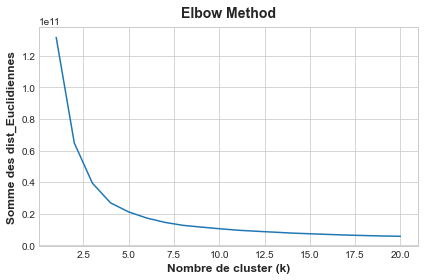

In [70]:
g=sns.lineplot(x=range(1,21), y=sse)

g.set(xlabel ="Nombre de cluster (k)", ylabel = "Somme des dist_Euclidiennes", title ='Elbow Method')

plt.show()

In [71]:
kmeans = KMeans(n_clusters=2,n_init=25, random_state=2)

X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,Cluster
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452.6,0,0,0,1,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358.5,0,0,0,1,0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352.1,0,0,0,1,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341.3,0,0,0,1,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342.2,0,0,0,1,0,0


In [72]:
X["Cluster"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

Examinons maintenant quelques parcelles pour voir à quel point cela était efficace. Tout d'abord, un nuage de points qui montre la répartition géographique des clusters. Il semble que l'algorithme ait créé des segments distincts pour les zones à revenu élevé sur les côtes.

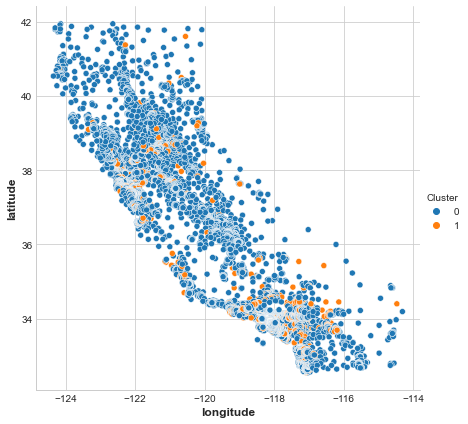

In [73]:
sns.relplot(x="longitude", y="latitude", hue="Cluster", data=X, height=6)
plt.show()

In [74]:
df1.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [75]:
fig = plt.figure()
fig = px.scatter_3d(X, x='total_bedrooms', y='latitude', z='longitude',
              color='Cluster')
fig.show()

# ax = fig.add_subplot(projection='3d')
# my_cmap = plt.get_cmap('hsv')
# for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
#     xs = df1["longitude"]
#     ys = df1["latitude"]
# #     zs = df1["population"] # df1.drop(["longitude", "latitude"], axis=1)
#     ax.scatter(xs, ys, marker=m, cmap = my_cmap) # c =couleur[X.labels_]

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# plt.show()

<Figure size 432x288 with 0 Axes>

La cible dans cet ensemble de données est MedHouseVal (valeur moyenne de la maison). Ces boîtes à moustaches montrent la distribution de la cible au sein de chaque cluster. Si le regroupement est informatif, ces distributions devraient, pour la plupart, se séparer à travers MedHouseVal

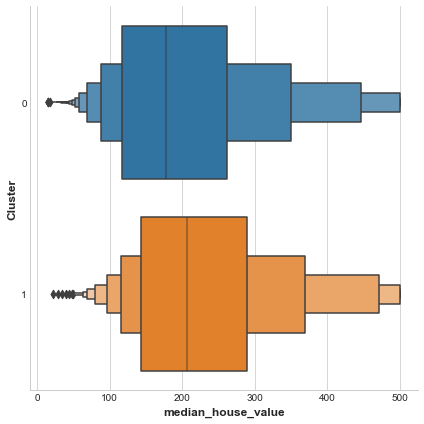

In [76]:
X["median_house_value"] = df["median_house_value"]
sns.catplot(x="median_house_value", y="Cluster", data=X, kind="boxen", height=6)
plt.show()